### Spark Twitter 整合案例實作(分析)

In [114]:
import json

In [115]:
#可以用＊取得所有檔案
tweetInput = "file:/Users/yungchuanlee/workspace_spark/spark-twitter-sbt/data/output/tweets_*/part-*"

In [116]:
twitter_txt = sc.textFile(tweetInput)

In [117]:
print(twitter_txt.take(1))

['{"createdAt":"Apr 7, 2018 9:51:29 PM","id":982654606399492096,"text":"RT @92LINERB0Y: (retweet to vote)\\n\\nplay basketball with\\n\\n@BTS_twt #MTVBRKPOPBTS #PremiosMTVMiaw","source":"\\u003ca href\\u003d\\"http://twitter.com/download/iphone\\" rel\\u003d\\"nofollow\\"\\u003eTwitter for iPhone\\u003c/a\\u003e","isTruncated":false,"inReplyToStatusId":-1,"inReplyToUserId":-1,"isFavorited":false,"isRetweeted":false,"favoriteCount":0,"retweetCount":0,"isPossiblySensitive":false,"lang":"en","contributorsIDs":[],"retweetedStatus":{"createdAt":"Apr 7, 2018 3:08:41 PM","id":982553235897499648,"text":"(retweet to vote)\\n\\nplay basketball with\\n\\n@BTS_twt #MTVBRKPOPBTS #PremiosMTVMiaw","source":"\\u003ca href\\u003d\\"http://twitter.com/download/android\\" rel\\u003d\\"nofollow\\"\\u003eTwitter for Android\\u003c/a\\u003e","isTruncated":false,"inReplyToStatusId":982537577432465413,"inReplyToUserId":736865769858818048,"isFavorited":false,"isRetweeted":false,"favoriteCount":36,"inReplyToScr

In [118]:
#output twitter text with json format
for txt in twitter_txt.take(1):
    print(json.dumps(json.loads(txt), indent=4, sort_keys=False))

{
    "createdAt": "Apr 7, 2018 9:51:29 PM",
    "id": 982654606399492096,
    "text": "RT @92LINERB0Y: (retweet to vote)\n\nplay basketball with\n\n@BTS_twt #MTVBRKPOPBTS #PremiosMTVMiaw",
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
    "isTruncated": false,
    "inReplyToStatusId": -1,
    "inReplyToUserId": -1,
    "isFavorited": false,
    "isRetweeted": false,
    "favoriteCount": 0,
    "retweetCount": 0,
    "isPossiblySensitive": false,
    "lang": "en",
    "contributorsIDs": [],
    "retweetedStatus": {
        "createdAt": "Apr 7, 2018 3:08:41 PM",
        "id": 982553235897499648,
        "text": "(retweet to vote)\n\nplay basketball with\n\n@BTS_twt #MTVBRKPOPBTS #PremiosMTVMiaw",
        "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>",
        "isTruncated": false,
        "inReplyToStatusId": 982537577432465413,
        "inReplyToUserId": 736865769858818048,
 

In [119]:
print("starting read training data...")
twitterTable=spark.read.json(tweetInput)
twitterTable.printSchema()

starting read training data...
root
 |-- contributorsIDs: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- createdAt: string (nullable = true)
 |-- currentUserRetweetId: long (nullable = true)
 |-- extendedMediaEntities: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- displayURL: string (nullable = true)
 |    |    |-- end: long (nullable = true)
 |    |    |-- expandedURL: string (nullable = true)
 |    |    |-- id: long (nullable = true)
 |    |    |-- mediaURL: string (nullable = true)
 |    |    |-- mediaURLHttps: string (nullable = true)
 |    |    |-- sizes: struct (nullable = true)
 |    |    |    |-- 0: struct (nullable = true)
 |    |    |    |    |-- height: long (nullable = true)
 |    |    |    |    |-- resize: long (nullable = true)
 |    |    |    |    |-- width: long (nullable = true)
 |    |    |    |-- 1: struct (nullable = true)
 |    |    |    |    |-- height: long (nullable = true)
 |    |    |    | 

### DataFrame API 使用

In [120]:
print("Total data count: ", twitterTable.count())

Total data count:  10147


In [121]:
twitterTable.select(['text']).limit(10).show()

+--------------------+
|                text|
+--------------------+
|RT @inkforgod_: 2...|
|             bmsはいった|
|하잉고 주작이 입에발렸네 한심....|
|口が腐る単語=インスタグラム、イン...|
|i rarely go spend...|
|RT @ben_muangwong...|
|RT @ispraews: ละอ...|
|RT @IshuGupta3011...|
|RT @nnnnut: ก็ถือ...|
| 쪼고미그리는거넘재밋어서멈추지못해~~|
+--------------------+



In [122]:
twitterTable.select(['user.lang', 'user.name','text']).limit(10).show()

+----+-----------+--------------------+
|lang|       name|                text|
+----+-----------+--------------------+
|  en|   ตามารถไฟ|RT @inkforgod_: 2...|
|  ja|       うつゆら|             bmsはいった|
|  ko|     배덕의웅앵웅|하잉고 주작이 입에발렸네 한심....|
|  ja|    Frank.O|口が腐る単語=インスタグラム、イン...|
|  en|         KK|i rarely go spend...|
|  th|   💘석진오빠💘|RT @ben_muangwong...|
|  th|         🌈|RT @ispraews: ละอ...|
|  en|Pawan Yadav|RT @IshuGupta3011...|
|  th|บธขี้อ้อน😛|RT @nnnnut: ก็ถือ...|
|  ko|         ろん| 쪼고미그리는거넘재밋어서멈추지못해~~|
+----+-----------+--------------------+



In [138]:
from pyspark.sql.functions import desc
#demo group, filter and sort
twitterTable.groupBy("user.lang").count().filter("count >= 10").sort(desc("count")).limit(10).show()

+----+-----+
|lang|count|
+----+-----+
|  en| 4165|
|  ja| 1377|
|  es|  957|
|  pt|  734|
|  th|  599|
|  ar|  585|
|  ko|  579|
|  tr|  239|
|  fr|  217|
|  id|  142|
+----+-----+



In [124]:
#define udf to calculate percentage
from pyspark.sql.functions import udf, lit, col, sum
def calculate_port(val, tot):
    return round((val / tot)*100,2)
calculate_port=udf(calculate_port)

In [139]:
#use group by to analyze lang
twitterLangCount=twitterTable.groupBy("user.lang").count().filter("count >= 10").sort(desc("count")).limit(10)
#get total count of count >= 10
totCnt=twitterLangCount.select(sum('count').alias('tot')).take(1)[0]['tot']
#use udf to calculate percentage
twitterLangCount.select('lang', 'count', calculate_port(col('count'), lit(totCnt)).alias('pcnt')).show()

+----+-----+-----+
|lang|count| pcnt|
+----+-----+-----+
|  en| 4165|43.41|
|  ja| 1377|14.35|
|  es|  957| 9.97|
|  pt|  734| 7.65|
|  th|  599| 6.24|
|  ar|  585|  6.1|
|  ko|  579| 6.04|
|  tr|  239| 2.49|
|  fr|  217| 2.26|
|  id|  142| 1.48|
+----+-----+-----+



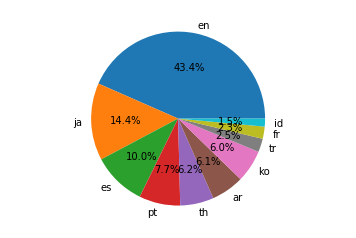

In [140]:
pd=twitterLangCount.toPandas()

import matplotlib.pyplot as plt
%matplotlib inline

labels=list(pd['lang'])
sizes=list(pd['count'])
plt.axis('equal')
plt.pie(sizes , labels = labels,autopct='%1.1f%%')
plt.show()

### Spark SQL 使用

In [127]:
#register temp view to use spark sql statement
twitterTable.createOrReplaceTempView("tweetTable")

In [128]:
spark.sql("select count(*) from tweetTable").show()

+--------+
|count(1)|
+--------+
|   10147|
+--------+



In [129]:
spark.sql("select text from tweetTable limit 10").show()

+--------------------+
|                text|
+--------------------+
|RT @inkforgod_: 2...|
|             bmsはいった|
|하잉고 주작이 입에발렸네 한심....|
|口が腐る単語=インスタグラム、イン...|
|i rarely go spend...|
|RT @ben_muangwong...|
|RT @ispraews: ละอ...|
|RT @IshuGupta3011...|
|RT @nnnnut: ก็ถือ...|
| 쪼고미그리는거넘재밋어서멈추지못해~~|
+--------------------+



In [141]:
#demo group, filter and sort
spark.sql("select user.lang, count(*) as count from tweetTable group by user.lang having count(*) >= 10 order by count desc limit 10").show()

+----+-----+
|lang|count|
+----+-----+
|  en| 4165|
|  ja| 1377|
|  es|  957|
|  pt|  734|
|  th|  599|
|  ar|  585|
|  ko|  579|
|  tr|  239|
|  fr|  217|
|  id|  142|
+----+-----+



In [142]:
twitterLangCount=spark.sql("select user.lang, count(*) as count from tweetTable group by user.lang having count(*) >= 10 order by count desc limit 10")
#get total count of count >= 10
twitterLangCount.createOrReplaceTempView("twitter_lang_cnt")
totCnt=spark.sql("select sum(count) as tot from twitter_lang_cnt").take(1)[0]['tot']
print("totCnt=", totCnt)

totCnt= 9594


In [143]:
#use udf to calculate percentage
spark.sql('select lang, count, round(count/' + str(totCnt) + '*100,2) as pcnt from twitter_lang_cnt').show()

+----+-----+-----+
|lang|count| pcnt|
+----+-----+-----+
|  en| 4165|43.41|
|  ja| 1377|14.35|
|  es|  957| 9.97|
|  pt|  734| 7.65|
|  th|  599| 6.24|
|  ar|  585|  6.1|
|  ko|  579| 6.04|
|  tr|  239| 2.49|
|  fr|  217| 2.26|
|  id|  142| 1.48|
+----+-----+-----+



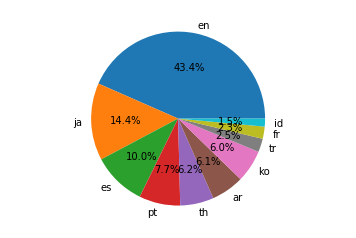

In [144]:
pd=twitterLangCount.toPandas()

import matplotlib.pyplot as plt
%matplotlib inline

labels=list(pd['lang'])
sizes=list(pd['count'])
plt.axis('equal')
plt.pie(sizes , labels = labels,autopct='%1.1f%%')
plt.show()